In [2]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps)

# Print a concise summary of apps dataframe
print(apps.info())
print(apps.isna().any())
# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =        Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
5              5                         Paper flowers instructions   
6              6            Smoke Effect Photo Maker - Smoke Editor   
7              7                                   Infinite Painter   
8              8                               Garden Coloring Book   
9              9                      Kids Paint Free - Drawing Fun   
10            10                            Text on Photo - Fonteee   
11            11            Name Art Photo Editor - Focus n Filters   
12            12                     T

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7589,8697,Profile Pictures - Best DP Status,FAMILY,4.3,131,5.4,"50,000+",Free,0,Everyone,Entertainment,"November 29, 2017",1.2.1,4.1 and up
8095,9215,Paraglider Dashboard,SPORTS,4.6,549,2.8,"50,000+",Free,0,Everyone,Sports,"March 3, 2018",2.1.4,4.0 and up
2323,2974,FotMob - Live Soccer Scores,SPORTS,4.7,410384,NaN,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device
6993,8058,Oración CX,LIFESTYLE,5.0,103,3.8,"5,000+",Free,0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
3727,4643,I Love U Theme&Emoji Keyboard,PERSONALIZATION,4.6,655,3.5,"100,000+",Free,0,Everyone,Personalization,"May 8, 2018",4.3,4.1 and up


In [6]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
        print(apps[col])
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

0           10,000
1          500,000
2        5,000,000
3       50,000,000
4          100,000
5           50,000
6           50,000
7        1,000,000
8        1,000,000
9           10,000
10       1,000,000
11       1,000,000
12      10,000,000
13         100,000
14         100,000
15           5,000
16         500,000
17          10,000
18       5,000,000
19      10,000,000
20         100,000
21         100,000
22         500,000
23         100,000
24          50,000
25          10,000
26         500,000
27         100,000
28          10,000
29         100,000
           ...    
9629           100
9630         1,000
9631        10,000
9632        50,000
9633       500,000
9634           100
9635       100,000
9636        10,000
9637         5,000
9638         1,000
9639            50
9640            10
9641           100
9642        10,000
9643           100
9644     5,000,000
9645         5,000
9646        10,000
9647        10,000
9648       100,000
9649         5,000
9650       1

In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [20]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout},show_link = True)

Average app rating =  4.173243045387998


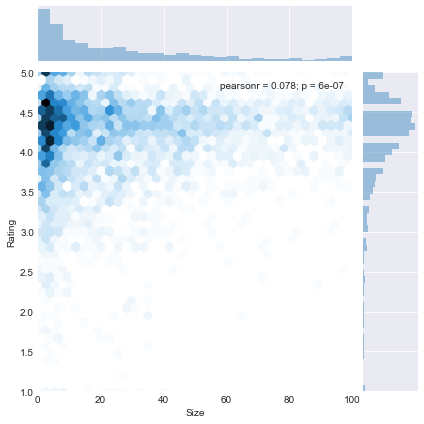

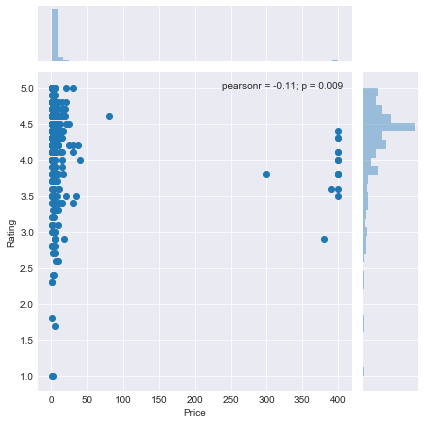

In [12]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


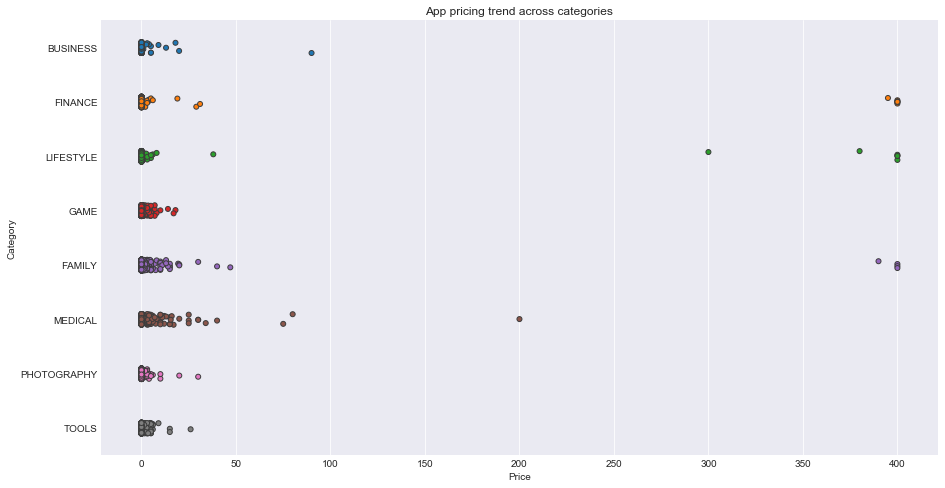

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

Text(0.5,1,'App pricing trend across categories after filtering for junk apps')

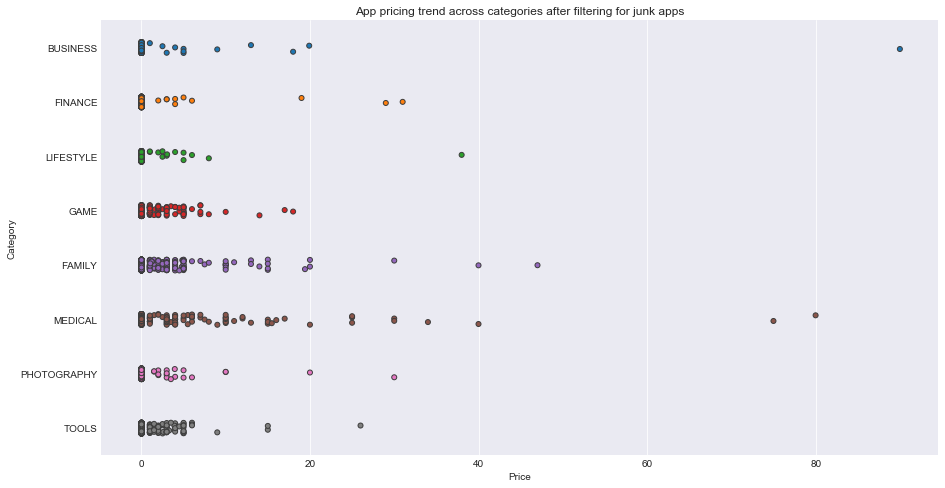

In [14]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x= 'Price', y= 'Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [15]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5,1,'Sentiment Polarity Distribution')

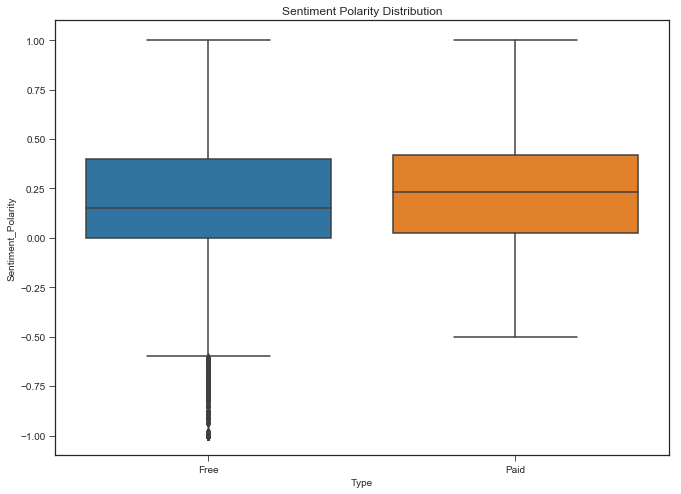

In [17]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')